# Approximating the transcendental sin() function

We will demonstrate an approximation for sin(), which we will call hart_sin().

We use the same technique that was often used in memory and compute limited vintage computers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Horner's Method

Horner's method allows one to evaluate a polynomial defined by a list of coefficients 'poly' at value 'val'
See: https://en.wikipedia.org/wiki/Horner%27s_method

This method relies on the polynomial remainder theorem (https://en.wikipedia.org/wiki/Polynomial_remainder_theorem) which is quite cool.

In [9]:
def horner(poly, val):
    l = len(poly)
        
    p = 0
    
    for i in range(l):
        a=poly[i]
        b=p*val
        p=a+b
    
    return p

# Implementing hart_sin()

We will use Horner's method and coefficients from Eq 3342 in  "Computer Approximations" by John Fraser Hart et al. (ISBN 0-88275-642-7).  The same or similar coefficients have been used in Apple, Commodore, and other 8-bit computers with using Microsoft BASIC.

GW-Basic, which Microsoft recently open sourced at the time of writing, used the same technique, which can be seen here in x86 assembly (using Eq 3341): https://github.com/microsoft/GW-BASIC/blob/09ad7bc671c90f0eeff4cb7593121ad6f170d903/MATH1.ASM

We could use Taylor's approximation as well, but these values work better in the domain in question.

In [3]:
def hart_sin(x):
       
    xp = x / (2*np.pi)
    
    
    co = (-0.342879073     *4*(2**20)/100000  ,0,
           0.16024702883   *4*(2**16)/1000    ,0,
          -0.468165101634  *4*(2**12)/100     ,0,
           0.7969260125988 *4*(2**8 )/10      ,0,
          -0.64596409526446*4*(2**4 )/1       ,0,
           0.15707963267616*4*(2**0 )/0.1     ,0 )
    
    return horner(co,xp)

# Trying hart_sin()

In [4]:
hart_sin(np.pi/4)

0.7071067811718126

In [5]:
np.sin(np.pi/4)

0.7071067811865475

# Plotting hart_sin()

We only consider a specific domain; the values could br mirrored for the rest of the sine function.

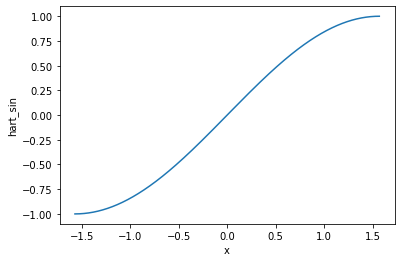

In [8]:
x = np.arange(-np.pi/2, np.pi/2, 0.001);
plt.plot(x,hart_sin(x))
plt.xlabel('x')
plt.ylabel('hart_sin')
plt.show()

# Error

We will plot the error across the domain.

As can be seen, the errors are tiny.

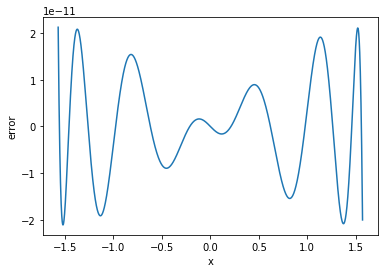

In [7]:
x = np.arange(-np.pi/2, np.pi/2, 0.001);
plt.plot(x,hart_sin(x)-np.sin(x))
plt.xlabel('x')
plt.ylabel('error')
plt.show()